In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
import helpers
plt.rcParams['figure.figsize'] = (10, 10)

In [2]:
x = datasets.load_boston()

df_boston = pd.DataFrame(x.data,columns=x.feature_names)
df_boston['target'] = pd.Series(x.target)

In [3]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


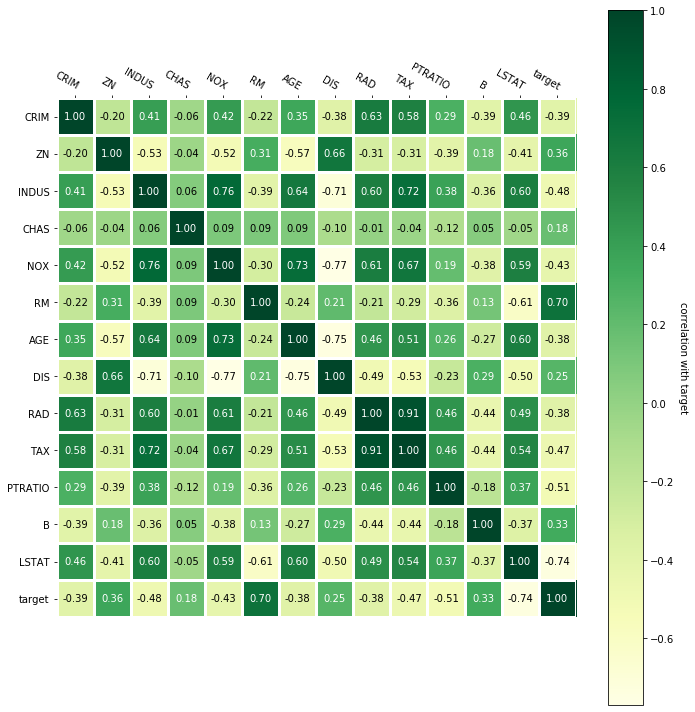

In [4]:
fig, ax = plt.subplots()

im, cbar = helpers.heatmap(df_boston.corr().values, df_boston.corr().columns, df_boston.corr().columns, ax=ax,
                   cmap="YlGn", cbarlabel="correlation with target")
texts = helpers.annotate_heatmap(im, valfmt="{x:.2f}")

fig.tight_layout()
plt.show()

In [5]:
def mean_squared_error(target, predicted):
    return np.mean((predicted - target) ** 2)

def gredient_decent(weights, x_values, y_values, predicted, learning_rate=1e-05):
    difference = predicted - y_values
    difference = np.multiply(difference, x_values)
    gradient = np.mean(difference, axis = 0)
    new_weights = weights - learning_rate * gradient.reshape(-1, 1)
    return new_weights

In [6]:
corr = df_boston.corr().target.values

selected_feature_index = np.where(np.abs(corr) > 0.4)[0]
selected_X = df_boston.iloc[:, selected_feature_index]

select_x = selected_X.iloc[:, :-1].values

In [7]:
# Load selected features and targets in seperate X and y value variables
x_values = np.ones((len(select_x), select_x.shape[1] + 1))
x_values[:, 1:] = select_x
y_values = x.target.reshape(-1, 1)

# Initializing weights to random values
weights = np.random.rand(select_x.shape[1] + 1, 1)

# Initialize Hyper parameters
learning_rate = 1e-05
epoch = 10000

In [8]:
cost = []

# Running Gredient Decent
for i in range(1, epoch+1):
    pred = np.matmul(x_values, weights) #<- Generate Prediction
    c = mean_squared_error(y_values, pred) #<- Calculate Error
    cost.append(c)
    weights = gredient_decent(weights, x_values, y_values, pred, learning_rate) #<- Update weights

Text(0.5, 0, 'Iterations')

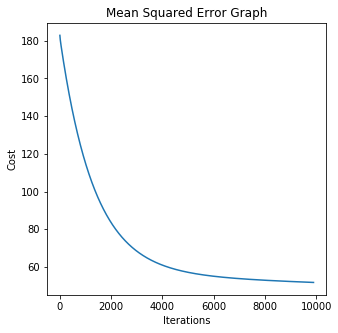

In [9]:
fig = plt.figure(figsize=(5, 5))
plt.plot(list(range(len(cost) - 100)), cost[100:])
plt.title("Mean Squared Error Graph")
plt.ylabel("Cost")
plt.xlabel("Iterations")

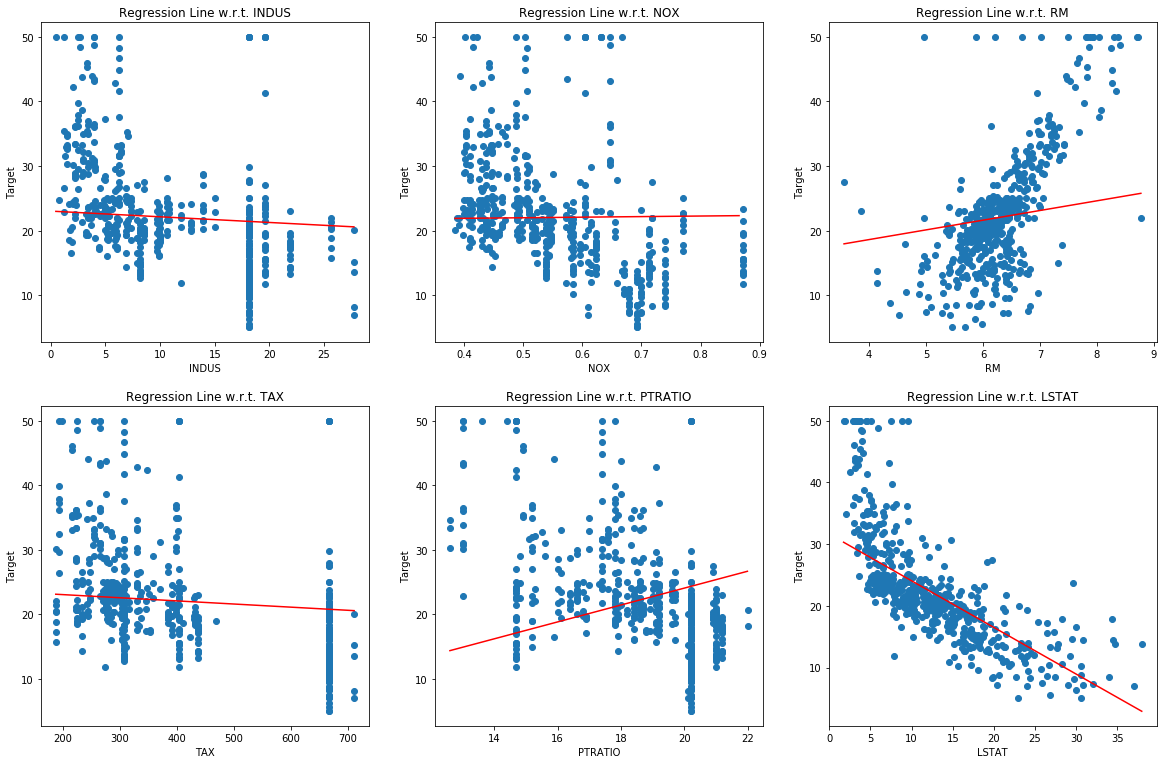

In [10]:
mean_values = np.array(select_x.mean(axis = 0))
mean_values = np.insert(mean_values, 0, 1)
fig = plt.figure(figsize = (20, 20))

for i in range(1, 7):
    m = max(x_values[:, i])
    n = min(x_values[:, i])

    feature_values_for_plot = np.arange(n, m, 0.01)

    plot_x = np.ones((len(feature_values_for_plot), x_values.shape[1]))
    plot_x = np.multiply(plot_x, mean_values)

    plot_x[:, i] = feature_values_for_plot
    
    p = np.matmul(plot_x, weights)

    plt.subplot(3, 3, i)
    plt.scatter(x_values[:, i], y_values)
    plt.plot(plot_x[:, i], p, c = 'r')
    plt.title("Regression Line w.r.t. {}".format(x.feature_names[selected_feature_index[i - 1]]))
    plt.ylabel("Target")
    plt.xlabel("{}".format(x.feature_names[selected_feature_index[i - 1]]))